In [10]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
import math
import random
import numpy as np
from scipy.optimize import minimize
from qiskit_ibm_provider import IBMProvider

try:
    from qiskit_ionq import IonQProvider, ErrorMitigation
except (ImportError):
    %pip install qiskit-ionq
    from qiskit_ionq import IonQProvider, ErrorMitigation

from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error 
from qiskit_aer import AerSimulator

try:
    from qiskit_ionq import IonQProvider
except ImportError:
    %pip install --quiet qiskit-ionq
    from qiskit_ionq import IonQProvider 

from IonQAPIservice import IonQAPIservice

f = open("C:\\Users\\fouad\\Documents\\tokens.txt", "r")
next = f.readline()
TOKEN = next[:len(next)-1]
next = f.readline()
TOKEN_IONQ = next[:len(next)-1]

service = IonQAPIservice(TOKEN_IONQ)

 Name              Qubits   Status   Access?  Degraded?  avg. Queue Time  (last updated)
 qpu.harmony:       11    available    Yes      No               0:00:00  (2023-08-22 14:21:09)
 qpu.aria-1:        25  unavailable    Yes      No        1 day, 5:37:57  (2023-08-22 14:21:09)
 simulator:         29    available    Yes      No               0:01:23  (2023-08-22 14:21:09)


In [2]:
# backend uses the IonQ native simulator
provider = IonQProvider(TOKEN_IONQ)
backend = provider.get_backend('ionq_simulator')
backend_type = "(IonQ Simulator, no noise)"

DEBIAS = False

In [3]:
def apply_fixed_ansatz(qubits, parameters):

    for iz in range (0, len(qubits)):
        circ.ry(parameters[0][iz], qubits[iz])

    circ.cz(qubits[0], qubits[1])
    circ.cz(qubits[2], qubits[0])



circ = QuantumCircuit(3)
apply_fixed_ansatz([0, 1, 2], [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
circ.draw()

┌───────┐      
q_0: ┤ Ry(1) ├─■──■─
     ├───────┤ │  │ 
q_1: ┤ Ry(1) ├─■──┼─
     ├───────┤    │ 
q_2: ┤ Ry(1) ├────■─
     └───────┘

In [4]:
# Creates the Hadamard test

def had_test(gate_type, qubits, auxiliary_index, parameters):

    circ.h(auxiliary_index)

    apply_fixed_ansatz(qubits, parameters)

    for ie in range (0, len(gate_type[0])):
        if (gate_type[0][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])
        if (gate_type[0][ie] == 2):
            circ.cx(auxiliary_index, qubits[ie])

    for ie in range (0, len(gate_type[1])):
        if (gate_type[1][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])
        if (gate_type[1][ie] == 2):
            circ.cx(auxiliary_index, qubits[ie])
    
    circ.h(auxiliary_index)
    
circ = QuantumCircuit(4)
had_test([[0, 0, 0], [0, 0, 1]], [1, 2, 3], 0, [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
circ.draw()

┌───┐           ┌───┐
q_0: ──┤ H ├─────────■─┤ H ├
     ┌─┴───┴─┐       │ └───┘
q_1: ┤ Ry(1) ├─■──■──┼──────
     ├───────┤ │  │  │      
q_2: ┤ Ry(1) ├─■──┼──┼──────
     ├───────┤    │  │      
q_3: ┤ Ry(1) ├────■──■──────
     └───────┘

In [5]:
import numpy as np
from functools import reduce

SHOTS = 10000
DEBIAS = False

o = []

for i in np.linspace(0, 2*np.pi, 50):
    circ = QuantumCircuit(4, 1)
    had_test([[0, 0, 0], [0, 0, 1]], [1, 2, 3], 0, [[i, i, i]])
    circ.measure(0, 0)
    job = service.submit_job(circ, backend=backend, sampler_seed=123456789, noise_model="ideal", error_mitigation={"debias":DEBIAS}, metadata={"shots":SHOTS}, shots=SHOTS)
    result = service.retrieve_job(job, wait_minutes=3)
    counts = service.extract_counts(job)
    outputstate = reduce(lambda a,h: a + counts[h]/1024 if h[len(h)-1] == '1' else a, counts, 0)
    o += [outputstate]

    


... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/22088361-9c34-4335-a63d-9f3f5bacb60b/results
https://api.ionq.co/v0.3/jobs/22088361-9c34-4335-a63d-9f3f5bacb60b/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/7c0cf0eb-b4a5-4ddf-a398-f4b0ef594729/results
https://api.ionq.co/v0.3/jobs/7c0cf0eb-b4a5-4ddf-a398-f4b0ef594729/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/cb934908-dde6-4c55-ad83-bceb8322801a/results
https://api.ionq.co/v0.3/jobs/cb934908-dde6-4c55-ad83-bceb8322801a/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/99af7a83-b51b-4f7a-a81e-d0a067bd9a7c/results
https://api.ionq.co/v0.3/jobs/99af7a83-b51b-4f7a-a81e-d0a067bd9a7c/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/c4b36ec6-8482-4e07-aa75-16b115031c57/results
https://api.ionq.co/v0.3/jobs/c4b36ec6-8482-4e07-aa75-16b115031c57/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/7ebd747d-88a4-4c33-b2b0-45fe1458a120/results
https://api.ionq.co/v0.3/jobs/7

In [6]:
#SHOTS = 10000
DEBIAS = False

o_noise = []

for i in np.linspace(0, 2*np.pi, 50):
    circ = QuantumCircuit(4, 1)
    had_test([[0, 0, 0], [0, 0, 1]], [1, 2, 3], 0, [[i, i, i]])
    circ.measure(0, 0)
    job = service.submit_job(circ, backend=backend, sampler_seed=123456789, noise_model="aria-1", error_mitigation={"debias":DEBIAS}, metadata={"shots":SHOTS}, shots=SHOTS)
    result = service.retrieve_job(job, wait_minutes=3)
    counts = service.extract_counts(job)
    outputstate = reduce(lambda a,h: a + counts[h]/SHOTS if h[len(h)-1] == '1' else a, counts, 0)
    o_noise += [outputstate]



... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/d9e0027c-af6a-435c-aeb5-d8fe9b9523fd/results
https://api.ionq.co/v0.3/jobs/d9e0027c-af6a-435c-aeb5-d8fe9b9523fd/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/bedfe33d-d4ce-4a40-ba1a-91ea7336b172/results
https://api.ionq.co/v0.3/jobs/bedfe33d-d4ce-4a40-ba1a-91ea7336b172/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/58610e71-dc21-422d-8ed1-0ef46f2b7682/results
https://api.ionq.co/v0.3/jobs/58610e71-dc21-422d-8ed1-0ef46f2b7682/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/f7ad7dd5-632a-419c-b1ea-76fd7169b284/results
https://api.ionq.co/v0.3/jobs/f7ad7dd5-632a-419c-b1ea-76fd7169b284/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/a460c598-3af8-40cd-b215-b3da6e7d1d74/results
https://api.ionq.co/v0.3/jobs/a460c598-3af8-40cd-b215-b3da6e7d1d74/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/761f1ec1-a69a-44dd-b9fb-8098027eb7bd/results
https://api.ionq.co/v0.3/jobs/7

In [7]:
#SHOTS = 1000
DEBIAS = True

import IonQAPIservice
o_deb = []

for i in np.linspace(0, 2*np.pi, 50):
    circ = QuantumCircuit(4, 1)
    had_test([[0, 0, 0], [0, 0, 1]], [1, 2, 3], 0, [[i, i, i]])
    circ.measure(0, 0)
    job = service.submit_job(circ, backend=backend, sampler_seed=123456789, noise_model="aria-1", error_mitigation={"debias":DEBIAS}, metadata={"shots":SHOTS}, shots=SHOTS)
    result = service.retrieve_job(job, wait_minutes=3, verbose=False, sharpen=True)
    counts = service.extract_counts(job)
    outputstate = reduce(lambda a,h: a + counts[h]/SHOTS if h[len(h)-1] == '1' else a, counts, 0)
    o_deb += [outputstate]

... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/c2323644-2b8b-47ca-8f91-a1d385e37956/results
https://api.ionq.co/v0.3/jobs/c2323644-2b8b-47ca-8f91-a1d385e37956/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/e536f2ac-aec0-4bd0-9eb9-2c49e5250d33/results
https://api.ionq.co/v0.3/jobs/e536f2ac-aec0-4bd0-9eb9-2c49e5250d33/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/6ee40e6a-a199-4ab1-b41f-1096110d22da/results
https://api.ionq.co/v0.3/jobs/6ee40e6a-a199-4ab1-b41f-1096110d22da/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/811e28c9-2896-43f8-afc6-e5239d254721/results
https://api.ionq.co/v0.3/jobs/811e28c9-2896-43f8-afc6-e5239d254721/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/0b11ab36-63fc-49bb-96ee-84f0b6be48f9/results
https://api.ionq.co/v0.3/jobs/0b11ab36-63fc-49bb-96ee-84f0b6be48f9/results
... up to 3.0 min to go
https://api.ionq.co/v0.3/jobs/0df43a90-1fb1-4ccb-96e3-d328baf3c3bd/results
https://api.ionq.co/v0.3/jobs/0

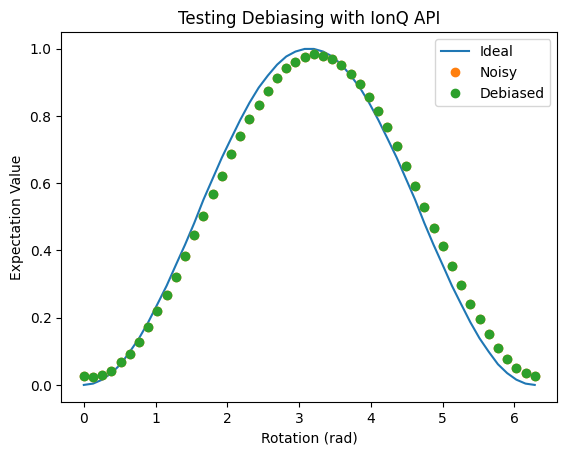

In [9]:
from matplotlib import pyplot as plt

plt.plot(np.linspace(0, 2 * np.pi, 50), o, label="Ideal")
plt.plot(np.linspace(0, 2 * np.pi, 50), o_noise, "o", label="Noisy")
plt.plot(np.linspace(0, 2 * np.pi, 50), o_deb, "o", label="Debiased")
plt.legend()
plt.xlabel("Rotation (rad)")
plt.ylabel("Expectation Value")
plt.title("Testing Debiasing with IonQ API")
plt.show()